In [4]:
import pandas as pd #for handling raw data
import numpy as np
import codecs
import matplotlib.pyplot as plt
#opens the data set, in comment you cant paste the file directory to r'___' C:\...\...\filename.csv
df=pd.read_csv(codecs.open(r'1907672.csv','rU', 'utf-8'),
               delimiter=',',decimal='.',header=0)
print(df.tail(5))

           STATION          NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
60140  HUE00100247  BUDAPEST, HU   47.5108    19.0206      153.0  2018-12-27   
60141  HUE00100247  BUDAPEST, HU   47.5108    19.0206      153.0  2018-12-28   
60142  HUE00100247  BUDAPEST, HU   47.5108    19.0206      153.0  2018-12-29   
60143  HUE00100247  BUDAPEST, HU   47.5108    19.0206      153.0  2018-12-30   
60144  HUE00100247  BUDAPEST, HU   47.5108    19.0206      153.0  2018-12-31   

       TAVG TAVG_ATTRIBUTES  TMAX TMAX_ATTRIBUTES  TMIN TMIN_ATTRIBUTES  
60140   NaN             NaN   9.5             ,,E   2.8             ,,E  
60141   NaN             NaN   9.8             ,,E   5.5             ,,E  
60142   NaN             NaN   9.0             ,,E   4.9             ,,E  
60143   NaN             NaN   6.8             ,,E   3.6             ,,E  
60144   NaN             NaN   7.4             ,,E   3.4             ,,E  


In [15]:
#df=df[['DATE', 'TAVG', 'TMAX', 'TMIN']]
df_bp, df_lorinc = [x for _, x in df.groupby(df['STATION'])]
df_lorinc

STATION                          NAME  LATITUDE  LONGITUDE  \
0      HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
1      HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
2      HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
3      HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
4      HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
...            ...                           ...       ...        ...   
17041  HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
17042  HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
17043  HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
17044  HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   
17045  HUM00012843  BUDAPEST PESTSZENTLORINC, HU    47.433     19.183   

       ELEVATION        DATE  TAVG TAVG_ATTRIBUTES  TMAX TMAX_ATTRIBUTES  \
0          139.0  1973-01-01  -1.2            H,,S   NaN             NaN   
1          139.0  1973-01-02   0.5            H,,S   NaN             NaN   
2          139.0  1973-01-03   1.8            H,,S   NaN             NaN   
3          139.0  1973-01-04   1.2            H,,S   NaN             NaN   
4          139.0  1973-01-05  -0.5            H,,S   3.0             ,,S   
...          ...         ...   ...             ...   ...             ...   
17041      139.0  2019-10-07   8.1            H,,S  12.9             ,,S   
17042      139.0  2019-10-08   8.4            H,,S  14.7             ,,S   
17043      139.0  2019-10-09  14.6            H,,S  21.1             ,,S   
17044      139.0  2019-10-10  13.6            H,,S  17.7             ,,S   
17045      139.0  2019-10-11  12.6            H,,S   NaN             NaN   

       TMIN TMIN_ATTRIBUTES  
0       NaN             NaN  
1       NaN             NaN  
2       NaN             NaN  
3       0.0             ,,S  
4      -2.0             ,,S  
...     ...             ...  
17041   NaN             NaN  
17042   0.2             ,,S  
17043   6.3             ,,S  
17044   NaN             NaN  
17045   6.1             ,,S  

[17046 rows x 12 columns]

[Text(0, 0.5, 'T[°C]'), Text(0.5, 0, 'DATE')]

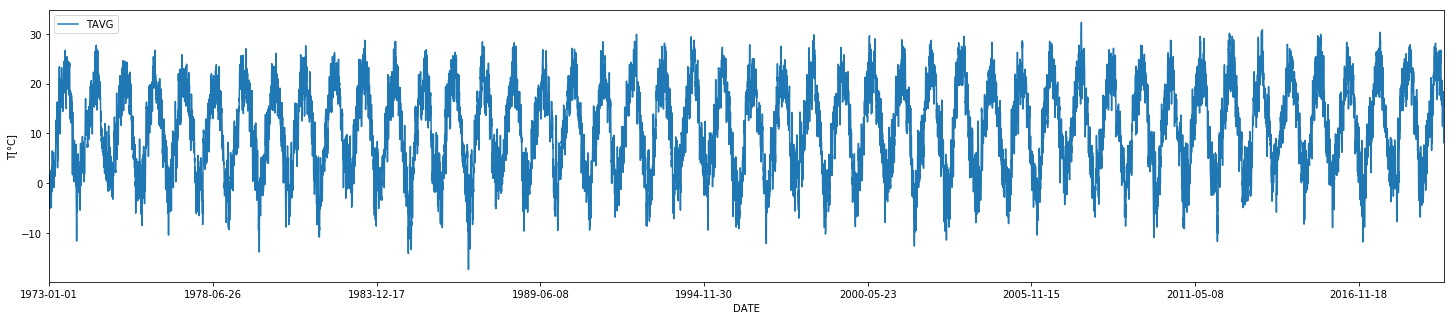

In [14]:
ax=df_lorinc.plot(figsize = (25,5),kind='line', x='DATE', y='TAVG')

ax.set(xlabel="DATE", ylabel="T[°C]")

[Text(0, 0.5, 'Tmax[°C]'), Text(0.5, 0, 'DATE')]

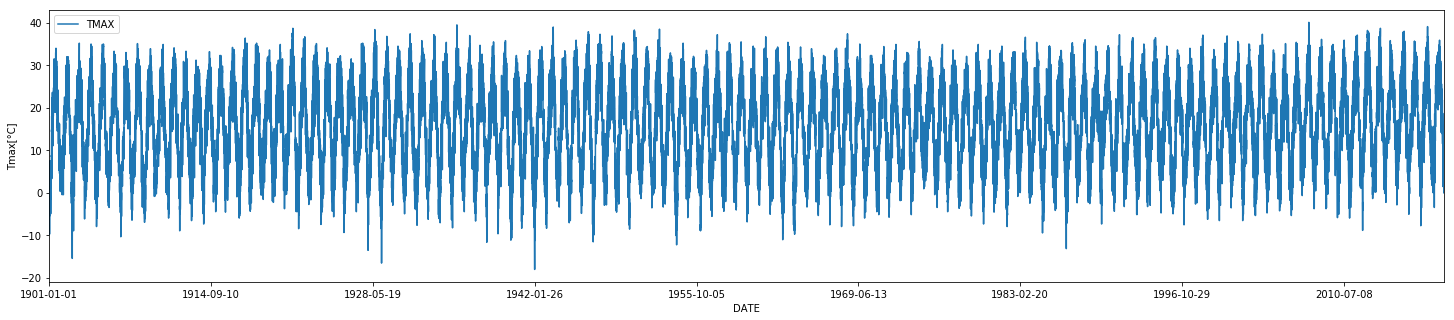

In [17]:
ay=df_bp.plot(figsize = (25,5),kind='line', x='DATE', y='TMAX')
ay.set(xlabel="DATE", ylabel="Tmax[°C]")

In [3]:
Tavg=[]
for column in df.columns[1:]:
    Tavg.append(df[column].tail(50).mean())
print(Tavg)

Tc=[]
for i in range(0,len(Tavg)):
    Tc.append((Tavg[i]+(25-Tavg[-2])))

results=pd.DataFrame()
result_header=list(df.columns.values)
del result_header[:1]
results['Measured']=result_header
results['Tc']=Tc
print(results)

#print(df['302 <Driver Tc> (C)'].tail(100))

[67.32579999999999, 80.04334, 56.707, 63.69256, 25.426620000000003, 25.204819999999994]
               Measured        Tc
0      301 <LED Tp> (C)  66.89918
1       302 <T ref> (C)  79.61672
2   303 <Driver Tc> (C)  56.28038
3  304 <T heatsink> (C)  63.26594
4       315 <T box> (C)  25.00000
5   316 <T ambient> (C)  24.77820


In [5]:
name=str(input())
path = askopenfilename()
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book
results.to_excel(writer, sheet_name = name)
df.to_excel(writer,sheet_name=name,startcol=0,startrow=10, index=False)
writer.save()
wb=load_workbook(path)
ws=wb[name]
ws.add_image(img,'E1')

#ws.cell(row=4,column=4).value=Tavg[-1]

wb.save(path)

1208830800mA_30W


##### 